Случайная величина имеет экспоненциальный закон распределения 

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats

Генерируем выборку объема 25

[0.69, 0.87, 0.79, 1.36, 0.13, 4.61, 0.05, 1.32, 0.52, 1.12, 1.22, 1.41, 0.31, 0.38, 0.06, 0.04, 1.69, 0.84, 1.28, 2.75, 1.04, 0.17, 0.78, 0.23, 3.07]


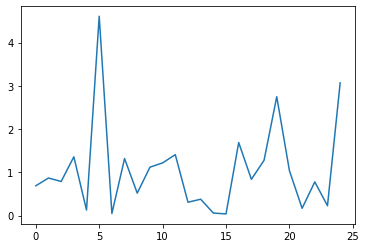

In [25]:
xn = []
n = 25
for i in range(n):
  xn.append(round(np.random.exponential(1), 2))
print(xn)  
plt.plot(xn) 
plt.show()  

Построение вариационного ряда

In [26]:
xn_ = np.sort(xn) 
print("вариационный ряд:", xn_)

вариационный ряд: [0.04 0.05 0.06 0.13 0.17 0.23 0.31 0.38 0.52 0.69 0.78 0.79 0.84 0.87
 1.04 1.12 1.22 1.28 1.32 1.36 1.41 1.69 2.75 3.07 4.61]


In [27]:
#мода определена только для дискретного ряда
median = xn_[12]
print("медиана:", median)
scope = xn_[n - 1] - xn_[0]
print("размах:", scope)
#нахождение оценок первого момента, второго и третьего центральных моментов, а также нахождение оценки коэффициента ассиметрии
𝛼1 = np.mean(xn)
𝜇2 = 0
𝜇3 = 0
for xi in xn:
  𝜇2 += ((xi - 𝛼1) ** 2) / n
  𝜇3 += ((xi - 𝛼1) ** 3) / n
𝛾 = 𝜇3 / ((𝜇2) ** (3/2))
print("оценка первого момента(мат. ожидания):", 𝛼1)
print("оценка коэффициента ассиметрии:", 𝛾)
#нахождение теоритических значений моментов и коэффициента ассиметрии в pdf на странице 4
print("первый момент: 1")
print("коэффициент ассиметрии: 2")

медиана: 0.84
размах: 4.57
оценка первого момента(мат. ожидания): 1.0692
оценка коэффициента ассиметрии: 1.7868488075749946
первый момент: 1
коэффициент ассиметрии: 2


Построение гистограммы и плотности распределения на одном графике

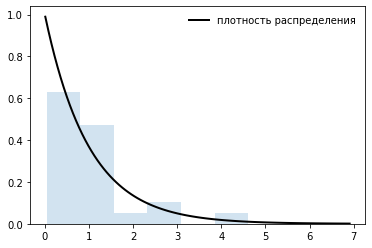

In [28]:
from scipy.stats import expon
rv = expon()
x_tmp = np.linspace(expon.ppf(0.01),
                expon.ppf(0.999), 100)
plt.plot(x_tmp, rv.pdf(x_tmp), 'k-', lw=2, label="плотность распределения") #построение плотности распределения экспоненциального распределения
plt.hist(xn, density=True, histtype='bar', alpha=0.2, bins='sturges') #построение гистограммы по нашей выборке, количество корзин k = 1 + log2(n) = 5,64 = 6
plt.legend(loc='best', frameon=False)
plt.show()

Построение boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x(25%):  0.31
x(50%):  0.84
x(75%):  1.32
𝜀:  1.01
левая граница:  0.04
правая граница:  2.75
количество выбросов: 2 , значения: [3.07, 4.61]


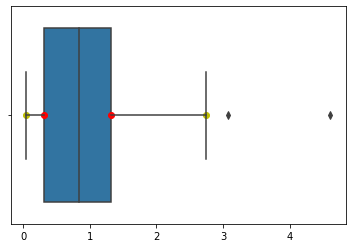

In [30]:
import seaborn as sns
sns.boxplot(xn_)
x25 = xn_[int(np.floor((n-1)/4))] #находим квартили 
x75 = xn_[int(np.floor(3*(n-1)/4))] 
print("x(25%): ", x25)  
print("x(50%): ", median)
print("x(75%): ", x75)
𝜀 = x75 - x25 
print("𝜀: ", 𝜀)
left = max(x25 - 1.5*𝜀, xn_[0]) #левая граница - наименьшее значение выборки, превышающее x25 - 1.5*𝜀
right = min(x75 + 1.5*𝜀, xn_[n - 3]) #правая граница - наибольшее значение выборки, меньшее x75 + 1.5*𝜀
print("левая граница: ", left)
print("правая граница: ", right)
emissions = []
for xi_ in xn_:
  if xi_ < left or xi_ > right:
    emissions.append(xi_)
print("количество выбросов:", len(emissions), ", значения:", emissions)
plt.scatter(x25, 0, c = ['r'])
plt.scatter(x75, 0, c = ['r'])
plt.scatter(left, 0, c = ['y'])
plt.scatter(right, 0, c = ['y'])
plt.show()

Построение эмпирической функции распределения

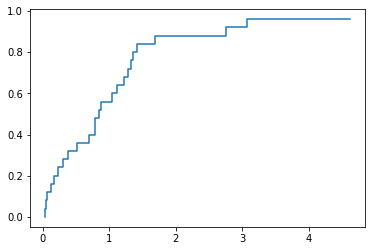

In [31]:
plt.step(xn_, np.linspace(0, 1, len(xn_), endpoint=False))
plt.show()

Ядерная оценка плотности распределения: все параболы по отдельности

каждая парабола по отдельности


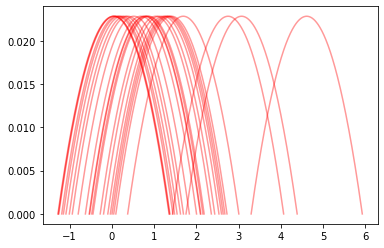

In [32]:
s = np.sqrt(n/(n-1)*𝜇2) #корень несмещенной оценки плотности распределения
h = 2.344 * s/(n**0.2)
kernels = []

for xi in xn_:
    x_ = np.linspace(xi - h, xi + h, 400)
    kernel = 0.75*(1-((x_ - xi)/h)**2)*(1/n/h)
    kernels.append(kernel)
    plt.plot(x_, kernel, color='r', alpha=0.4)

print("каждая парабола по отдельности")
plt.show()

Ядерная оценка плотности распределения: сумма парабол 

сумма всех парабол


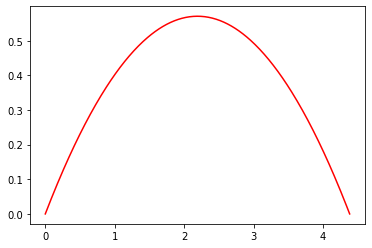

In [33]:
S = np.sum(kernels, axis=0)

plt.plot(np.linspace(0, xn[n - 1] + h, 400), S, c='r')
print("сумма всех парабол")
plt.show()

Находим плотность распределения среднего арифметического элементов выборки   (теория в pdf на странице 4)

оценка первого момента: 1.0692
оценка второго момента: 2.2370759999999996
оценка дисперсии: 1.0458907017466021
Параметры закона нормального распределения среднего арифметического элементов выборки: мат. ожидание - 1.0692 , дисперсия - 0.0437554944


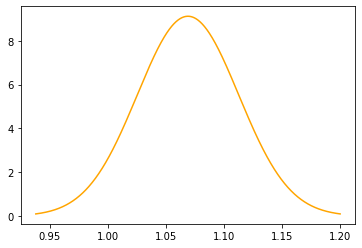

In [37]:
𝛼2 = 0
for xi in xn:
  𝛼2 += (xi**2)/n
print("оценка первого момента:", 𝛼1)
print("оценка второго момента:", 𝛼2)
𝜎 = np.sqrt(𝛼2 - 𝛼1**2)
print("оценка дисперсии:", 𝜎)
mu = 𝛼1
sigma = (𝜎**2)/n
print("Параметры закона нормального распределения среднего арифметического элементов выборки: мат. ожидание -", mu, ", дисперсия -", sigma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='orange')
plt.show()

Бутстраповская оценка плотности распределения среднего арифметического

гистограмма бутстраповской оценки плотности распределения среднего арифметического


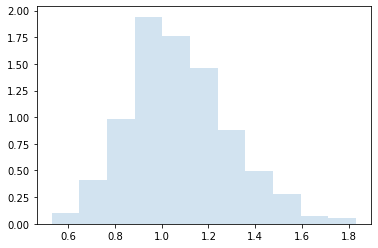

In [38]:
boot_𝛼1 = []
for i in range(1000):
  xn_sample = np.random.choice(xn, size = n)
  boot_𝛼1.append(np.mean(xn_sample))
plt.hist(boot_α1, density=True, histtype='bar', alpha=0.2, bins='sturges') 
print("гистограмма бутстраповской оценки плотности распределения среднего арифметического")

plt.show()

Сравнение плотности распределения среднего арифметического элементов выборки с ее бутстраповской оценкой

сравнение плотности распределения среднего арифметического элементов выборки с ее бутстраповской оценкой


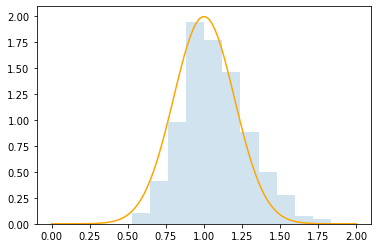

In [39]:
plt.hist(boot_α1, density=True, histtype='bar', alpha=0.2, bins='sturges') 
x = np.linspace(0., 2., 100)
plt.plot(x, stats.norm.pdf(x, 1, 1/n**(1/2)), color='orange')
print("сравнение плотности распределения среднего арифметического элементов выборки с ее бутстраповской оценкой")
plt.show()

Бутстраповская оценка плотности распределения коэффициента ассиметрии

гистограмма бутстраповской оценки плотности распределения коэффициента ассиметрии


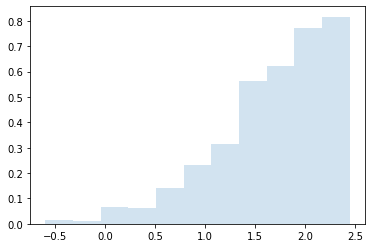

In [40]:
np.random.randint(2, size=10)
boot_𝛾_n = []
for i in range(1000):
  xn_sample = np.random.choice(xn, size = n)
  boot_mean = np.mean(xn_sample)
  boot_𝜇2 = 0
  boot_𝜇3 = 0
  for xi in xn:
    boot_𝜇2 += ((xi - boot_mean) ** 2) / n
    boot_𝜇3 += ((xi - boot_mean) ** 3) / n
  boot_𝛾 = boot_𝜇3 / ((boot_𝜇2) ** (3/2))
  boot_𝛾_n.append(boot_𝛾)
plt.hist(boot_γ_n, density=True, histtype='bar', alpha=0.2, bins='sturges') 
print("гистограмма бутстраповской оценки плотности распределения коэффициента ассиметрии")
plt.show()